In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('movie_profit.csv')
dataset = df.copy()
dataset.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


In [93]:
dataset = dataset.drop(['Unnamed: 0'], axis = 1)

In [94]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3401 non-null   object 
 1   movie              3401 non-null   object 
 2   production_budget  3401 non-null   float64
 3   domestic_gross     3401 non-null   float64
 4   worldwide_gross    3401 non-null   float64
 5   distributor        3353 non-null   object 
 6   mpaa_rating        3264 non-null   object 
 7   genre              3401 non-null   object 
dtypes: float64(3), object(5)
memory usage: 212.7+ KB


,production_budget,domestic_gross,worldwide_gross
count,3.401000e+03,3.401000e+03,3.401000e+03
mean,3.328474e+07,4.542179e+07,9.411512e+07
std,3.489239e+07,5.882566e+07,1.409182e+08
min,2.500000e+05,0.000000e+00,0.000000e+00
25%,9.000000e+06,6.118683e+06,1.061881e+07
50%,2.000000e+07,2.553382e+07,4.015902e+07
75%,4.500000e+07,6.032379e+07,1.176152e+08
max,1.750000e+08,4.745447e+08,1.304866e+09


In [95]:
dataset.shape

(3401, 8)

In [96]:
dataset.isna().sum()

release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
distributor           48
mpaa_rating          137
genre                  0
dtype: int64

In [97]:
dataset['distributor'] = dataset['distributor'].fillna(dataset['distributor'].mode()[0])
dataset['mpaa_rating'] = dataset['mpaa_rating'].fillna(dataset['mpaa_rating'].mode()[0])
dataset.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
distributor          0
mpaa_rating          0
genre                0
dtype: int64

In [98]:
dataset.duplicated().sum()

1

In [99]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

In [100]:
dataset.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,6/22/2007,Evan Almighty,175000000.0,100289690.0,174131329.0,Universal,PG,Comedy
1,7/28/1995,Waterworld,175000000.0,88246220.0,264246220.0,Universal,PG-13,Action


In [101]:
dataset['Profit/Loss Value'] = dataset['worldwide_gross'] - dataset['production_budget']  
dataset['Profit/Loss Value'] = dataset['Profit/Loss Value'].apply(lambda x: 'Loss' if x<0 else 'Profit')

In [102]:
dataset.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Profit/Loss Value
0,6/22/2007,Evan Almighty,175000000.0,100289690.0,174131329.0,Universal,PG,Comedy,Loss
1,7/28/1995,Waterworld,175000000.0,88246220.0,264246220.0,Universal,PG-13,Action,Profit


In [103]:
sns.set(style='dark')

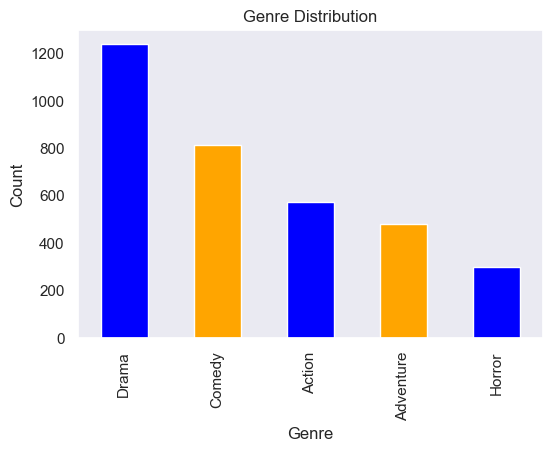

In [104]:
dataset['genre'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(6,4), color = ['blue', 'orange'])
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

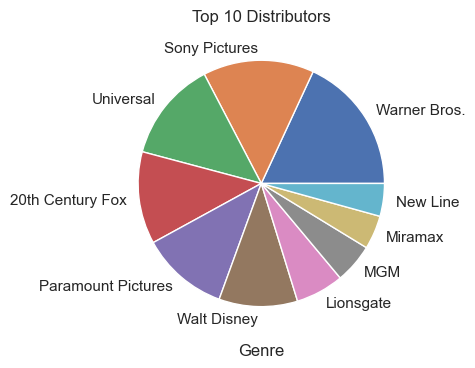

In [105]:
dataset['distributor'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie', figsize=(6,4))
plt.title('Top 10 Distributors')
plt.xlabel('Genre')
plt.ylabel('')
plt.show()

In [106]:
dataset.dtypes

release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
distributor           object
mpaa_rating           object
genre                 object
Profit/Loss Value     object
dtype: object

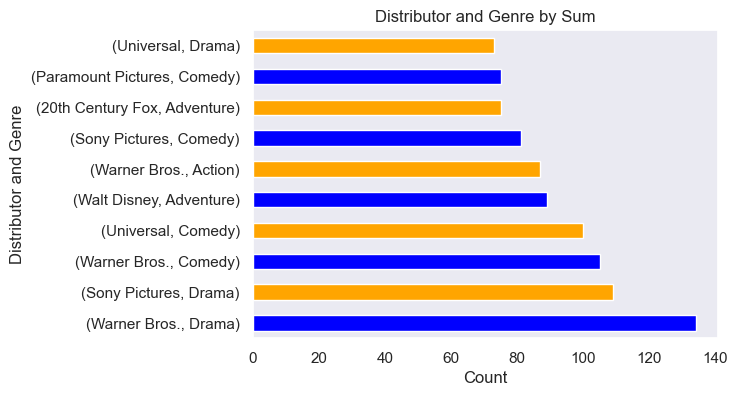

In [107]:
dataset.groupby('distributor')['genre'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(6,4), color=['blue', 'orange'])
plt.title('Distributor and Genre by Sum')
plt.xlabel('Count')
plt.ylabel('Distributor and Genre')
plt.show()

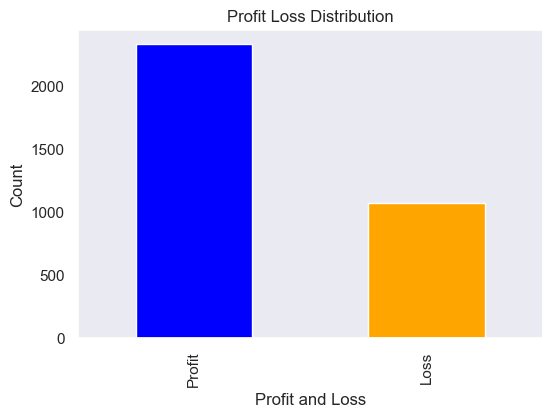

In [108]:
dataset['Profit/Loss Value'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(6,4), color = ['blue', 'orange'])
plt.title('Profit Loss Distribution')
plt.xlabel('Profit and Loss')
plt.ylabel('Count')
plt.show()